このノートブックでは常微分方程式を数値計算で解く方法を扱う

In [3]:
import numpy as np
import matplotlib.pyplot as plt

バネ・マス・ダンパ系の微分方程式を解く

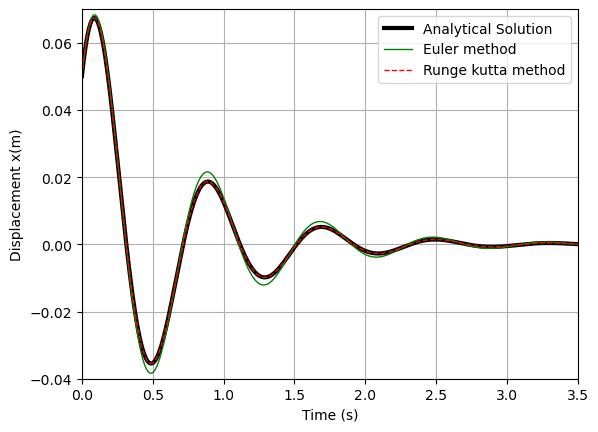

In [7]:
import numpy as np
import matplotlib.pyplot as plt


cParams = {
    "M": 5.0,
    "K": 320,
    "C": 16,
    "X0": 0.05,
    "V0": 0.4,
    "SIM_START": 0.0,
    "SIM_END": 5.0,
    "SIM_STEP": 0.005,
}


def calcAnalyticalSolution(t):
    # モデルパラメータ設定
    m = cParams["M"]
    c = cParams["C"]
    k = cParams["K"]
    v0 = cParams["V0"]
    x0 = cParams["X0"]
    # 振動パラメータ計算
    wn = np.sqrt(k/m)                            # 不減衰固有角振動数
    zeta = c/(2.0*np.sqrt(m*k))                  # 減衰比
    wd = np.sqrt(1-zeta**2)*wn                   # 減衰固有角振動数
    # 解の計算
    Amp = np.sqrt((x0**2 + ((zeta*wn*x0 + v0)/wd)**2))
    phi = np.arctan((zeta*wn*x0 + v0)/(x0*wd))
    x = Amp*np.exp(-zeta*wn*t)*np.cos(wd*t - phi)
    return x


def derFunc(t, y):
    # モデルパラメータ設定
    m = cParams["M"]
    c = cParams["C"]
    k = cParams["K"]
    # 状態方程式の立式
    u = [y[0], y[1]]
    A = [[-c/m, -k/m], [1, 0]]
    dy = np.dot(A, u)
    return dy


def solverEuler(f, tn, dt, yn):
    yn1 = yn + dt*f(tn, yn)
    return yn1


def solverRungekutta(f, tn, dt, yn):
    k1 = f(tn, yn)
    k2 = f(tn+dt/2.0, yn+k1*dt/2.0)
    k3 = f(tn+dt/2.0, yn+k2*dt/2.0)
    k4 = f(tn+dt, yn+k3*dt)
    yn1 = yn + dt*(k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    return yn1


if __name__ == "__main__":
    # 変数準備(固定ステップで計算するためあらかじめ用意しておく)
    sim_start = cParams["SIM_START"]
    sim_end = cParams["SIM_END"]
    sim_step = cParams["SIM_STEP"]
    num_step = int((sim_end-sim_start)/sim_step) + 1
    t = np.linspace(cParams["SIM_START"], cParams["SIM_END"], num_step)
    v0 = cParams["V0"]
    x0 = cParams["X0"]
    # 数値計算の格納結果
    v_eu = np.zeros(num_step)
    x_eu = np.zeros(num_step)
    v_rk = np.zeros(num_step)
    x_rk = np.zeros(num_step)

    # 解析解の計算
    x = calcAnalyticalSolution(t)

    # 数値計算による解
    for i in range(t.size):
        if (i < 1):
            # 初期値
            [v_eu[i], x_eu[i]] = [v0, x0]
            [v_rk[i], x_rk[i]] = [v0, x0]
        else:
            # 前進オイラー法
            [v_eu[i], x_eu[i]] = solverEuler(derFunc,
                                             t[i-1],
                                             sim_step,
                                             [v_eu[i-1], x_eu[i-1]])
            # ルンゲクッタ法
            [v_rk[i], x_rk[i]] = solverRungekutta(derFunc,
                                                  t[i-1],
                                                  sim_step,
                                                  [v_rk[i-1], x_rk[i-1]])

    # グラフ確認
    plt.plot(t, x, 'k', lw=3.0, label='Analytical Solution')
    plt.plot(t, x_eu, 'g', lw=1.0, label='Euler method')
    plt.plot(t, x_rk, 'r--', lw=1.0, label='Runge kutta method')
    plt.xlim(0, 3.5)
    plt.ylim(-0.04, 0.07)
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement x(m)')
    plt.legend()
    plt.grid()
    plt.show()
    # plt.savefig("./1dofVibSimulation.png")
